<center><u><H1>Support Vector Machines para Clasificación</H1></u></center>

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
%matplotlib inline

## Loading data:

In [95]:
df=pd.read_csv("../data/iris_dataset.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Preprocessing data:

In [96]:
#De text a numerro
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

LabelEncoder()

In [97]:
df['class']=le.transform(df['Class'].values)

In [98]:

X_train, X_test, y_train, y_test = train_test_split(df[['PetalLength','PetalWidth']], df['class'], test_size=0.3, random_state= 2019)

In [99]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [100]:
#datos estandarizados
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

## Defining the model

In [101]:
#Support vector machine
from sklearn.svm import SVC

In [102]:
#modelo lineal, C= regularizacion
svm = SVC(kernel='linear', C=1.0)

In [103]:
#Entrenamiento
svm.fit(X_train_std, y_train)

SVC(kernel='linear')

## Metrics:

In [104]:
y_pred = svm.predict(X_test_std)

In [105]:
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")

Accuracy Score: 0.9777777777777777


In [106]:
print(f"Confusion Matrix\n{confusion_matrix(y_test, y_pred)}")

Confusion Matrix
[[17  0  0]
 [ 0 16  1]
 [ 0  0 11]]


In [107]:
# Confusion Matrix in Pandas
print(pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted']))

Predicted   0   1   2
Actual               
0          17   0   0
1           0  16   1
2           0   0  11


In [108]:
print(f"Classification Report:\n{classification_report(y_test,y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.94      0.97        17
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [109]:
#Clasificacion en porcentajes
scores = cross_val_score(svm, X_test_std, y_test, cv=10)
print(f"Cross Val Scores:{scores}")

Cross Val Scores:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [110]:
#Valor mas acertado
scores1=cross_val_score(svm,X_combined_std,y_combined,cv=10)
print(f"Cross Val Scores:{scores1}")

Cross Val Scores:[0.93333333 0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 0.93333333 1.         0.93333333]


## Plotting linear and nonlinear models:

In [111]:
#Entrenar de nuevo
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_std, y_train)

SVC(kernel='linear')

In [112]:
#Archivo python con la funcion
import Plotting_Decision_Boundaries as pdb

C:\Users\julio\anaconda39\envs\python3.7\Practical_Machine_Learning_Python\Capitulo3-Machine_Learning\Plotting_Decision_Boundaries.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == item, 0], y=X[y == item, 1],alpha=0.8, c=colors[index], s=50, edgecolor='k',


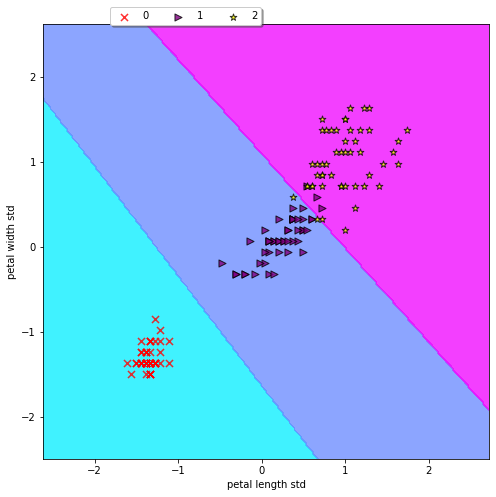

In [113]:
#Ejecutamos la funcion
pdb.plotting_db(X=X_combined_std,y=y_combined,classifier=svm)

C:\Users\julio\anaconda39\envs\python3.7\Practical_Machine_Learning_Python\Capitulo3-Machine_Learning\Plotting_Decision_Boundaries.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == item, 0], y=X[y == item, 1],alpha=0.8, c=colors[index], s=50, edgecolor='k',


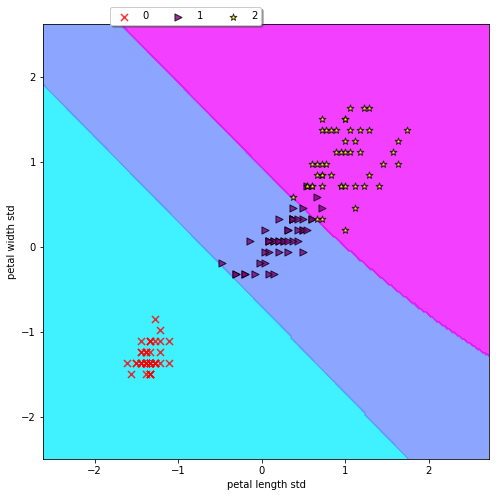

In [114]:
svm = SVC(kernel='sigmoid')
svm.fit(X_train_std, y_train)
pdb.plotting_db(X=X_combined_std,y=y_combined,classifier=svm)

C:\Users\julio\anaconda39\envs\python3.7\Practical_Machine_Learning_Python\Capitulo3-Machine_Learning\Plotting_Decision_Boundaries.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == item, 0], y=X[y == item, 1],alpha=0.8, c=colors[index], s=50, edgecolor='k',


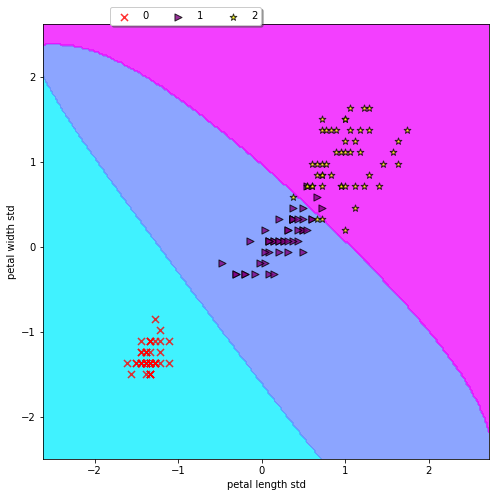

In [115]:
#Karnel rbm
svm = SVC(kernel='rbf', gamma=0.2)
svm.fit(X_train_std, y_train)
pdb.plotting_db(X=X_combined_std,y=y_combined,classifier=svm)
#A higher value of gamma will perfectly fit the training dataset, which causes over-fitting.
#Gamma=0.1 is considered to be a good default value.

C:\Users\julio\anaconda39\envs\python3.7\Practical_Machine_Learning_Python\Capitulo3-Machine_Learning\Plotting_Decision_Boundaries.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == item, 0], y=X[y == item, 1],alpha=0.8, c=colors[index], s=50, edgecolor='k',


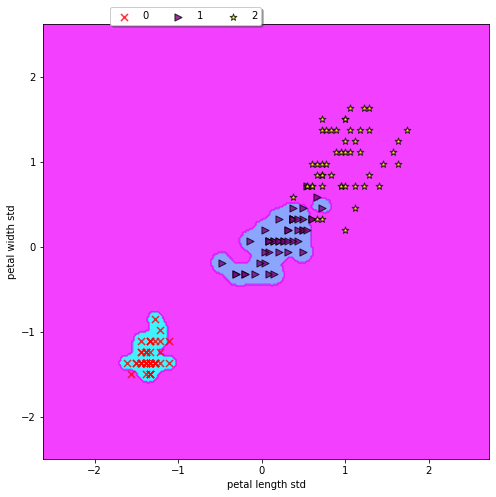

In [116]:
#Radial base function
svm = SVC(kernel='rbf', gamma=100)
svm.fit(X_train_std, y_train)
pdb.plotting_db(X=X_combined_std,y=y_combined,classifier=svm)

C:\Users\julio\anaconda39\envs\python3.7\Practical_Machine_Learning_Python\Capitulo3-Machine_Learning\Plotting_Decision_Boundaries.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == item, 0], y=X[y == item, 1],alpha=0.8, c=colors[index], s=50, edgecolor='k',


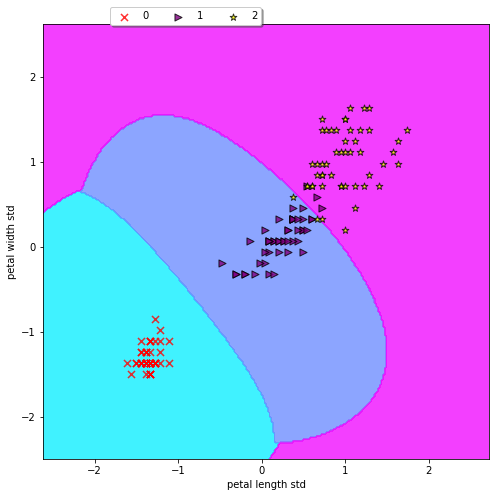

In [117]:
svm = SVC(kernel='rbf', gamma='auto')
svm.fit(X_train_std, y_train)
pdb.plotting_db(X=X_combined_std,y=y_combined,classifier=svm)

C:\Users\julio\anaconda39\envs\python3.7\Practical_Machine_Learning_Python\Capitulo3-Machine_Learning\Plotting_Decision_Boundaries.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == item, 0], y=X[y == item, 1],alpha=0.8, c=colors[index], s=50, edgecolor='k',


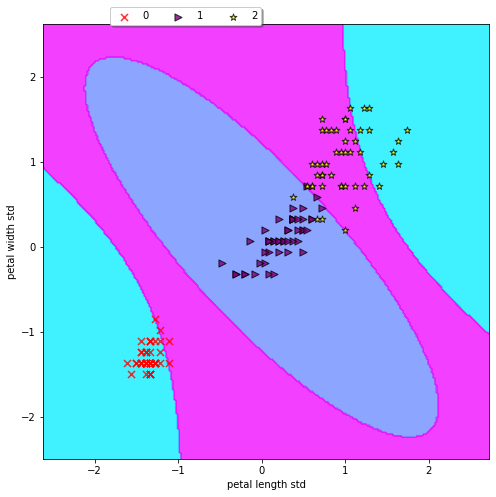

In [118]:
#Polinomic
svm = SVC(kernel='poly', degree=2)
svm.fit(X_train_std, y_train)
pdb.plotting_db(X=X_combined_std,y=y_combined,classifier=svm)

## Reference: 
http://scikit-learn.org/stable/modules/svm.html